# Solving Frozen Lake Problem Using Q-Learning

https://www.gymlibrary.dev/environments/toy_text/frozen_lake/

## Goal:

Imagine, there is a frozen lake from your home to office, you should walk on the frozen lake
to reach your office. But oops! there will be a hole in the frozen lake in between, so you have
to be careful while walking in the frozen lake to avoid getting trapped at holes.
Look at the below figure where,

1. S is the starting position (Home)
2. F is the Frozen lake where you can walk
3. H is the Hole which you have to be so careful about
4. G is the Goal (office)

**Actions:** Move in one of four directions: Left (0), Down (1), Right (2), Up (3)

**States:** Each grid cell is a state, indexed by its position.

**Rewards:**

+1 for reaching the goal
0 otherwise (including falling into a hole)

Each cell in this grid is assigned a state number from 0 to 15, laid out row-wise:

 0   1   2   3  

 4   5   6   7  

 8   9  10  11  

12  13  14  15  

 Okay, now let us use our agent instead of you to find the correct way to reach the office.
The agent goal is to find the optimal path to reach from S to G without getting trapped at H.
How an agent can achieve this? We give +1 point as a reward to the agent if it correctly
walks on the frozen lake and 0 points if it falls into the hole. So that agent could determine
which is the right action. An agent will now try to find the optimal policy. Optimal policy
implies taking the correct path which maximizes the agent reward. If the agent is
maximizing the reward, apparently agent is learning to skip the hole and reach the
destination.

First, we import necessary libraries

In [ ]:
# this gym version works without any issues
pip install gym==0.17.3

In [ ]:
import gym
import numpy as np

Initialize our gym environment

In [ ]:
# Stochastic
# env = gym.make('FrozenLake-v0', is_slippery=True)

 Let us see how the environment looks like

In [ ]:
# deterministic
env = gym.make('FrozenLake-v0', is_slippery=False)

In [ ]:
action_space_size = env.action_space.n
state_space_size = env.observation_space.n

In [ ]:
# we have total 4 actions, left-right-up-down
action_space_size

4

In [ ]:
# we have total 16 states
state_space_size

16

In [ ]:
# Lets initialize the Q-table
q_table = np.zeros((state_space_size, action_space_size))
q_table

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

**Structure of the Q-table:**

**Rows**: Represent the states of the environment.

**Columns**: Represent the possible actions an agent can take in each state.

**Entries**: The values (Q-values) in the table represent the expected cumulative reward of taking a particular action in a specific state and following the optimal policy afterward.


### Q-value Update Rule in Q-learning

The Q-value for a state-action pair \((s, a)\) is updated iteratively using the formula:

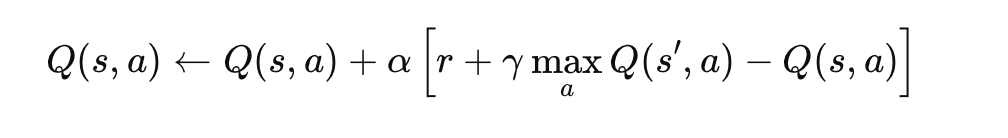

Where:
- \(s\): Current state
- \(a\): Action taken
- \(r\): Reward received
- \(s'\): Next state
- \(alpha): Learning rate (how quickly the agent updates its knowledge)
- \(gamma): Discount factor (importance of future rewards)
- \(max_a Q(s', a)\): Maximum Q-value for the next state \(s'\), considering all possible actions


In [ ]:
# Let's initiate hyperparameters
total_episodes = 10000
max_steps = 100
learning_rate = 0.8
gamma = 0.99
epsilon = 1.0
max_epsilon = 1.0
min_epsilon = 0.0
decay_rate = 0.001

### Explanation of Q-learning Hyperparameters

1. **`total_episodes`**:  
   - The total number of episodes (iterations) the agent will run in the environment.  
   - Higher values allow the agent to explore and learn more thoroughly.

2. **`max_steps`**:  
   - The maximum number of steps the agent can take in a single episode.  
   - Prevents episodes from running indefinitely and helps in controlling computation time.

3. **`learning_rate`** (alpha):  
   - Determines how quickly the agent updates the Q-values.  
   - A value closer to 1 prioritizes recent experiences, while a smaller value gives more weight to prior knowledge.

4. **`gamma`** (gamma):  
   - The discount factor, which balances the importance of immediate rewards versus future rewards.  
   - A value close to 1 emphasizes long-term rewards, while a value near 0 focuses on immediate rewards.

5. **`epsilon`**:  
   - The exploration rate at the start, controlling the agent's likelihood of exploring vs. exploiting.  
   - Higher values mean more exploration.

6. **`decay_rate`**:  
   - Controls the rate at which \( \epsilon \) decreases during training.  
   - A smaller value results in slower decay, allowing the agent to explore for a longer duration.


In [ ]:
rewards = []

for episode in range(total_episodes):
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0

    for step in range(max_steps):
      if np.random.uniform(0, 1) > epsilon:
        action = np.argmax(q_table[state, :]) #Exploit
      else:
        action = env.action_space.sample() #Explore

      new_state, reward, done, info = env.step(action)
      max_new_state = np.max(q_table[new_state, :])
      q_table[state, action] = q_table[state, action] + learning_rate * (reward + gamma * np.max(q_table[new_state, :]) - q_table[state, action])
      total_rewards += reward
      state = new_state

      if done:
        break

    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode)
    rewards.append(total_rewards)

print("Score over time: " + str(sum(rewards) / total_episodes))

# Close the environment
env.close()

Score over time: 0.89


In [ ]:
# Now lets analyze the Q-table
print(q_table)

[[0.94148015 0.95099005 0.95099005 0.94148015]
 [0.94148015 0.         0.96059601 0.95099005]
 [0.95099005 0.970299   0.95099005 0.96059601]
 [0.96059601 0.         0.95002234 0.95081987]
 [0.95099005 0.96059601 0.         0.94148015]
 [0.         0.         0.         0.        ]
 [0.         0.9801     0.         0.96059601]
 [0.         0.         0.         0.        ]
 [0.96059601 0.         0.970299   0.95099005]
 [0.96059601 0.9801     0.9801     0.        ]
 [0.970299   0.99       0.         0.970299  ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.9801     0.99       0.970299  ]
 [0.9801     0.99       1.         0.9801    ]
 [0.         0.         0.         0.        ]]


This is how the actions are indexed in the Q-table:

* index 0 = Left
* index 1 = Down
* index 2 = Right
* index 3 = Up

In [ ]:
# Let the agent play using the Q-table
# Let the agent play using the Q-table
for episode in range(5):
    state = env.reset()  # No need to unpack
    step = 0
    done = False

    print("****************************************************")
    print("EPISODE ", episode)

    for step in range(max_steps):
        # Choose the action with the highest Q-value
        action = np.argmax(q_table[state, :])

        # Take the action and observe the result
        new_state, reward, done, info = env.step(action)

        # Render the environment
        env.render(mode="human")

        if done:
            print("Number of steps:", step)
            break

        state = new_state

# Close the environment
env.close()

****************************************************
EPISODE  0
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
Number of steps: 5
****************************************************
EPISODE  1
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
Number of steps: 5
****************************************************
EPISODE  2
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
Number of steps: 5
****************************************************
EPISODE  3
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)